# U.S. Medical Insurance Costs

This notebook explores a dataset containing information about U.S. medical insurance costs. We will perform exploratory data analysis, including visualization of data distributions, correlation analysis, regional analysis, outlier detection, and linear regression analysis to understand the factors influencing medical insurance charges.

Let's start by loading the dataset and examining its structure and contents.


In [71]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [72]:
# Load the data
df = pd.read_csv('insurance.csv')
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


The dataframe contains the following 7 columns:

- **age**: Age of the individual
- **sex**: Gender of the individual (male/female)
- **bmi**: Body Mass Index, a measure of body fat based on height and weight
- **children**: Number of children/dependents covered by the insurance
- **smoker**: Smoking status of the individual (yes/no)
- **region**: Residential area in the U.S. (Northeast, Northwest, Southeast, Southwest)
- **charges**: Medical insurance charges billed by the insurance company

Now, we will perform exploratory data analysis (EDA) to determine if the dataframe needs any modifications or refinements.


In [73]:
# Checking for null values
nan_df = df[df.isna().any(axis=1)]
# Display rows with missing values, if any
if not nan_df.empty:
    print("Rows with missing values:")
    display(nan_df.head())
else:
    print("No missing values found in the dataset.")


No missing values found in the dataset.


In [74]:
# Looking at data types of each column
print(df.dtypes)


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [85]:
# Turning the sex and smoker columns into one-hot encoding for further analysis
df['sex_c'] = pd.get_dummies(df['sex'], drop_first=True).astype(int)
df['smoker_c'] = pd.get_dummies(df['smoker'], drop_first=True).astype(int)
print(df.head())

print('Number of male vs female in the dataframe:')
print(df.sex_c.value_counts())


   age     sex     bmi  children smoker     region      charges  sex_c  \
0   19  female  27.900         0    yes  southwest  16884.92400      0   
1   18    male  33.770         1     no  southeast   1725.55230      1   
2   28    male  33.000         3     no  southeast   4449.46200      1   
3   33    male  22.705         0     no  northwest  21984.47061      1   
4   32    male  28.880         0     no  northwest   3866.85520      1   

   smoker_c  
0         1  
1         0  
2         0  
3         0  
4         0  
Number of male vs female in the dataframe:
sex_c
1    676
0    662
Name: count, dtype: int64


In [86]:
# Summary statistics
df.describe()


,age,bmi,children,charges,sex_c,smoker_c
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000


Based on the information, the average age of individuals is 39, with a BMI of 30. On average, each person has at least one child. Approximately 50.5% of individuals are men, and 20% are smokers. The average medical insurance charges for each person amount to about $13,270.

Let's analyze which features have the greatest effect on the charges.

charges     1.000000
smoker_c    0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex_c       0.057292
Name: charges, dtype: float64


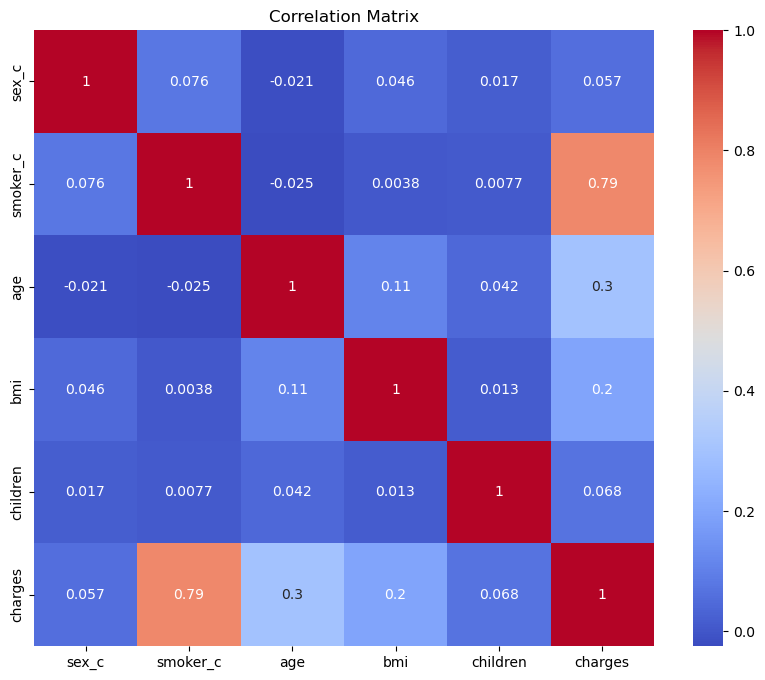

In [77]:
# Correlation matrix
# Filter only numeric columns for correlation
numeric_cols = ['sex_c', 'smoker_c', 'age', 'bmi', 'children', 'charges']
numeric_df = df[numeric_cols]
correlation_matrix = numeric_df.corr()
print(correlation_matrix['charges'].sort_values(ascending=False))

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


We observe a strong correlation (0.79) between smoking status and charges, indicating that smoking has a significant impact on medical insurance charges compared to other features.


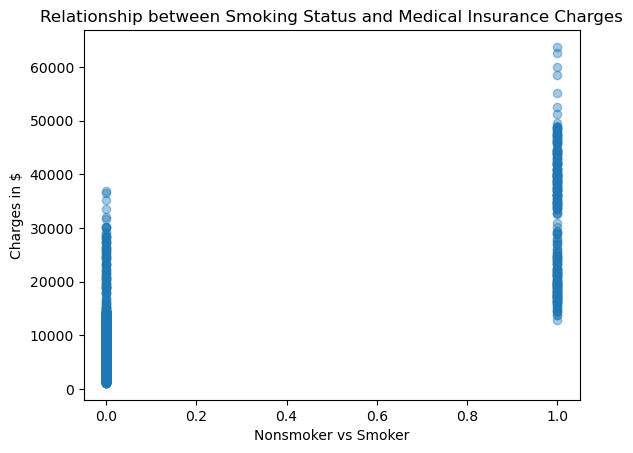

In [87]:
# Plotting the relationship between smoking status and medical insurance charges
plt.scatter(df.smoker_c, df.charges, alpha=0.4)
plt.xlabel('Nonsmoker vs Smoker')
plt.ylabel('Charges in $')
plt.title('Relationship between Smoking Status and Medical Insurance Charges')
plt.show()

### Data Distributions Analysis
In this section, we will visualize the distributions of various variables in our dataset using histograms and count plots. Understanding the distribution of each variable can provide valuable insights into the underlying data patterns and help identify any potential outliers or unusual trends.

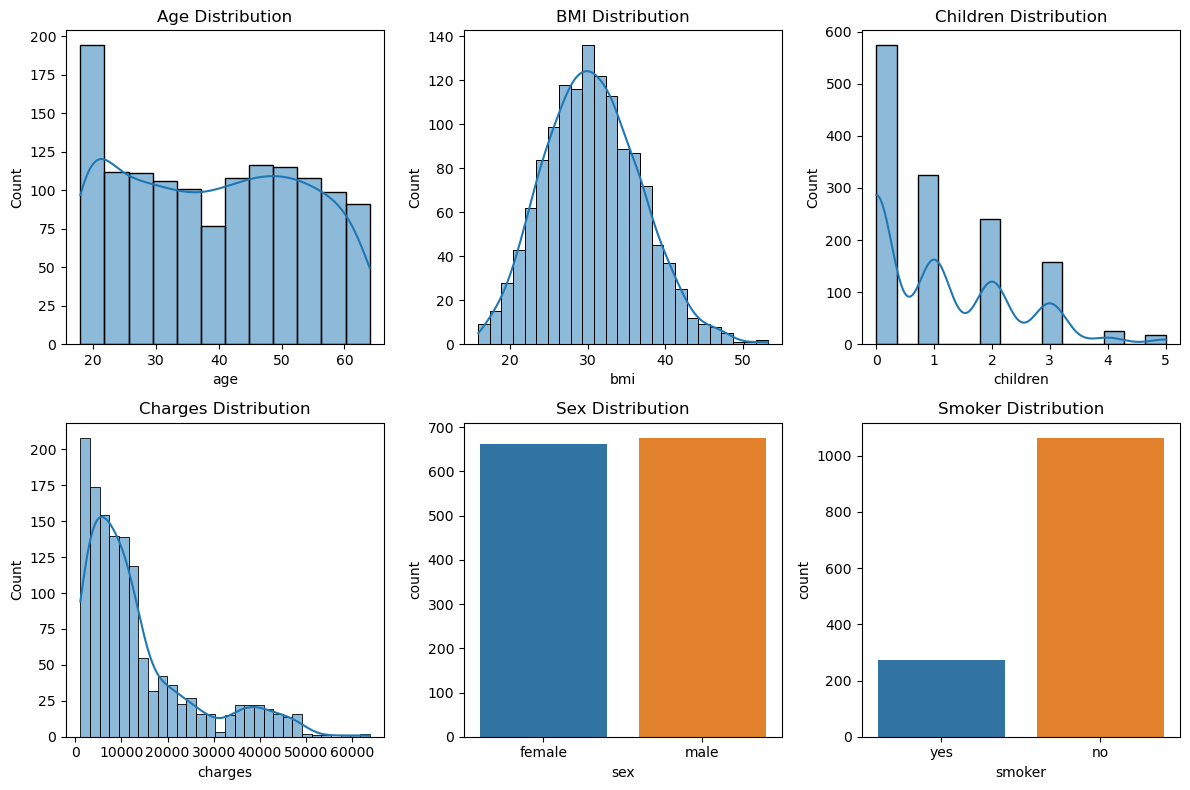

In [78]:
# Data distributions
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')

plt.subplot(2, 3, 2)
sns.histplot(df['bmi'], kde=True)
plt.title('BMI Distribution')

plt.subplot(2, 3, 3)
sns.histplot(df['children'], kde=True)
plt.title('Children Distribution')

plt.subplot(2, 3, 4)
sns.histplot(df['charges'], kde=True)
plt.title('Charges Distribution')

plt.subplot(2, 3, 5)
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')

plt.subplot(2, 3, 6)
sns.countplot(x='smoker', data=df)
plt.title('Smoker Distribution')

plt.tight_layout()
plt.show()

- **Age Distribution**: The histogram shows that the number of people aged 19 to 21 is higher than other age groups.
- **BMI Distribution**: This histogram displays the distribution of Body Mass Index (BMI) values, indicating a somewhat normal distribution with most people having a BMI around 30.
- **Children Distribution**: Most people have no or one child.
- **Charges Distribution**: The distribution of charges is highly skewed to the right, with most charges ranging from $4,000 to $10,000.
- **Sex Distribution**: The distribution is almost equal, indicating an equal number of men and women.
- **Smoker Distribution**: The majority of people are nonsmokers, with the count being about twice that of smokers.


### Analysis of Charges by Region

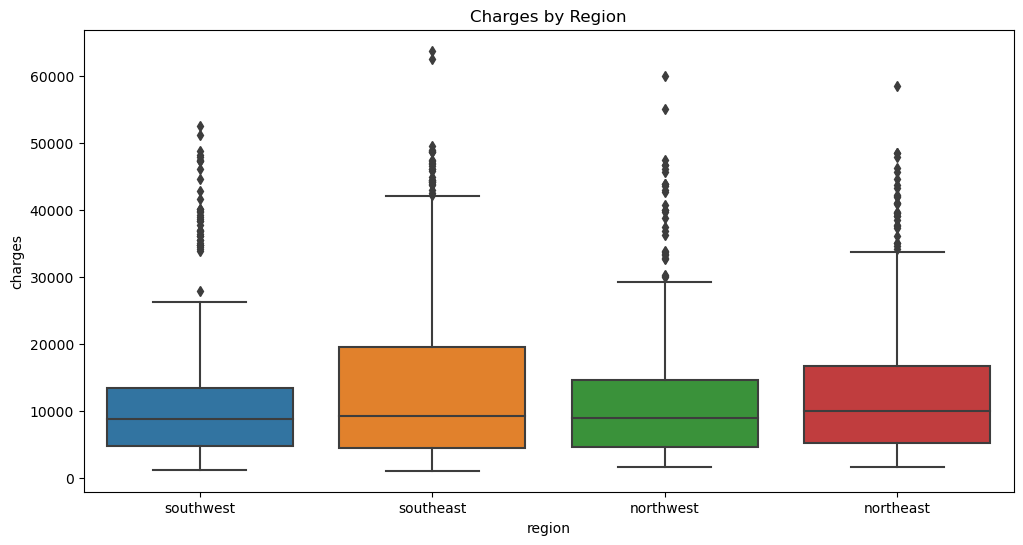

In [79]:
# Box plot of charges by region
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Charges by Region')
plt.show()

The box plot of charges by region shows that while the mean charges are similar across all regions, the Southeast stands out with a higher third quartile (Q3) and more outliers. This indicates that the Southeast has a wider range of charges and tends to have higher medical costs compared to other regions.


### Outlier Detection
Outliers can significantly influence the performance of a model. We will identify and investigate potential outliers in the `charges` variable:


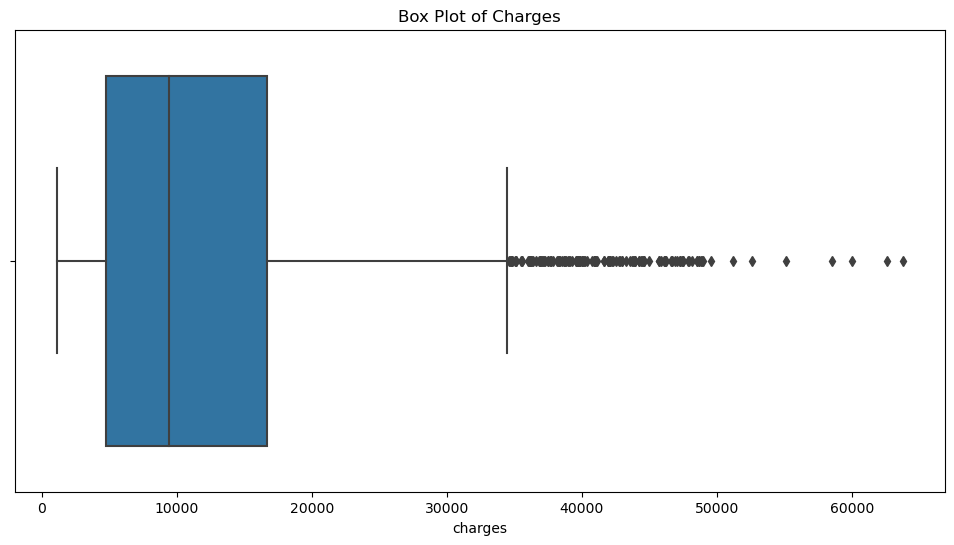

Number of outliers in charges: 139


,age,sex,bmi,children,smoker,region,charges,sex_c,smoker_c
14,27,male,42.13,0,yes,southeast,39611.7577,1,1
19,30,male,35.30,0,yes,southwest,36837.4670,1,1
23,34,female,31.92,1,yes,northeast,37701.8768,0,1
29,31,male,36.30,2,yes,southwest,38711.0000,1,1
30,22,male,35.60,0,yes,southwest,35585.5760,1,1


In [80]:
# Box plot for detecting outliers in charges
plt.figure(figsize=(12, 6))
sns.boxplot(x='charges', data=df)
plt.title('Box Plot of Charges')
plt.show()

# Identifying outliers
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['charges'] < (Q1 - 1.5 * IQR)) | (df['charges'] > (Q3 + 1.5 * IQR))]
print("Number of outliers in charges:", outliers.shape[0])
display(outliers.head())

### Linear Regression Analysis
In this section, we will perform a linear regression analysis to investigate how various features influence medical insurance charges. Linear regression is a statistical method that models the relationship between a dependent variable and one or more independent variables. Our goal is to understand the impact of factors such as age, BMI, number of children, gender, and smoking status on the insurance charges.


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Preparing the data
X = df[['age', 'bmi', 'children', 'sex_c', 'smoker_c']]
y = df['charges']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")

# Coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


Mean Squared Error: 33979257.05080822
R-squared: 0.7811302113434095
           Coefficient
age         257.068962
bmi         327.533514
children    427.254431
sex_c        -7.951788
smoker_c  23653.903315



As we can see, smoking status has the largest coefficient, indicating it has the greatest impact on insurance charges and significantly increases the cost. Age, BMI, and the number of children also increase the charges, but to a lesser extent. Gender has a very small effect.

In [83]:

# Evaluating the model using R-squared
r_squared = model.score(X_test, y_test)
print(f"R-squared: {r_squared}")

R-squared: 0.7811302113434095


### Key Findings

**Data Distributions:**
- **Age**: Higher number of individuals aged 19 to 21.
- **BMI**: Roughly normal distribution centered around 30.
- **Children**: Most individuals have no or one child.
- **Charges**: Highly right-skewed distribution, mostly between $4,000  to $10,000.
- **Sex**: Almost equal number of men and women.
- **Smoker**: The number of nonsmokers is much higher than smokekers.

**Correlation Analysis:**
- Smoking status has the highest correlation with medical charges (0.79).
- Age, BMI, and number of children also positively correlate with charges.

**Regional Analysis:**
- Southeast region shows the highest variability and more outliers in charges.

**Outlier Detection:**
- Significant outliers in the charges variable identified using the IQR method.

**Linear Regression Analysis:**
- Smoking status is the most significant predictor of higher charges.
- Age, BMI, and number of children also increase charges.
- Gender has a minimal effect.


## Conclusion

In this analysis of U.S. medical insurance costs, smoking status was identified as the most significant predictor of higher insurance charges. Age, BMI, and the number of children also contribute to higher charges, though to a lesser extent. The Southeast region showed the highest variability in charges, indicating regional disparities. Outlier detection highlighted significant outliers that could impact model performance.

The linear regression model explained approximately 78% of the variance in charges, providing valuable insights into the factors driving medical insurance costs. This information can inform policy decisions and individual health choices.
